In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df = df[df['job_title_short'] == 'Data Engineer']
df.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."


In [4]:
df_exploded = df.explode('job_skills')
df_exploded
skill_counts = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(20)
skill_counts

,skill_count,median_salary
job_skills,,
sql,113130,125000.0
python,108022,125000.0
aws,62049,130000.0
azure,60674,125000.0
spark,53656,134775.0
java,35559,134241.0
kafka,29073,140000.0
hadoop,28815,134241.0
scala,28716,137500.0


In [5]:
for i, skill in enumerate(skill_counts.index):
    print(skill, skill_counts['skill_count'].iloc[i], 
          skill_counts['median_salary'].iloc[i], 
          )


sql 113130 125000.0
python 108022 125000.0
aws 62049 130000.0
azure 60674 125000.0
spark 53656 134775.0
java 35559 134241.0
kafka 29073 140000.0
hadoop 28815 134241.0
scala 28716 137500.0
databricks 27477 125000.0
snowflake 26624 132500.0
airflow 25505 137280.0
gcp 22215 125000.0
nosql 21965 135000.0
git 19257 125000.0
power bi 18838 117500.0
tableau 18766 120000.0
redshift 18010 134241.0
sql server 16924 117500.0
mongodb 16582 125000.0


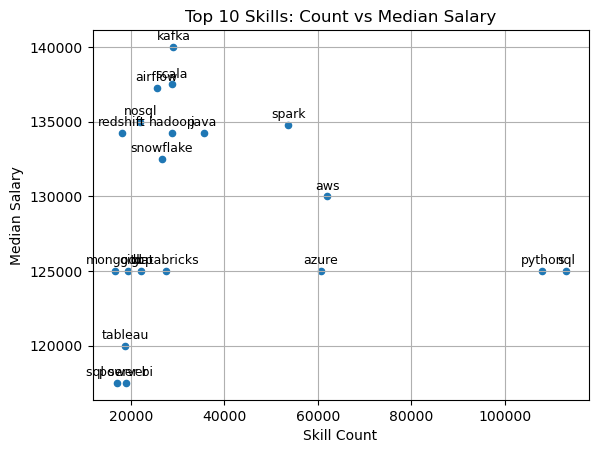

In [6]:
skill_counts.plot(kind='scatter', x='skill_count', y='median_salary', title='Top 10 Skills: Count vs Median Salary')

plt.xlabel('Skill Count')   
plt.ylabel('Median Salary')
plt.grid(True)



for i, skill in enumerate(skill_counts.index):
    plt.annotate(skill, (skill_counts['skill_count'].iloc[i], 
          skill_counts['median_salary'].iloc[i]),
          textcoords="offset points", xytext=(0,5), ha='center', fontsize=9
          )


plt.show()

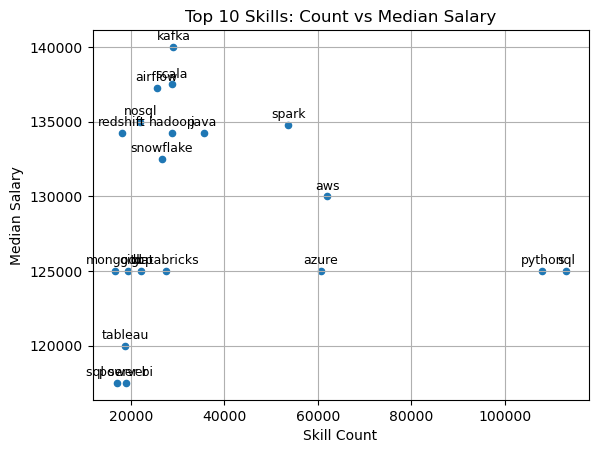

In [7]:
# %pip install adjustText
from adjustText import adjust_text

skill_counts.plot(kind='scatter', x='skill_count', y='median_salary', title='Top 10 Skills: Count vs Median Salary')

plt.xlabel('Skill Count')   
plt.ylabel('Median Salary')
plt.grid(True)



for i, skill in enumerate(skill_counts.index):
    plt.annotate(skill, (skill_counts['skill_count'].iloc[i], 
          skill_counts['median_salary'].iloc[i]),
          textcoords="offset points", xytext=(0,5), ha='center', fontsize=9
          )


plt.show()
